In [1]:
import numpy as np
import pandas as pd

2.1: Array Creation
Manual array creation:

2.2: Universal functions

In [ ]:

v1= np.array([[3,2,3],[1,2,1],[5,8,12]])
print(v1)
print(v1.mean(axis=0))

[[ 3  2  3]
 [ 1  2  1]
 [ 5  8 12]]
[3.         4.         5.33333333]


array([[ 3,  2,  3],
       [ 1,  2,  1],
       [ 5,  8, 12]])

2.3 Broadcasting

In [31]:
m = np.linspace(1,12,12).reshape(3,4)
print(m)
m[0:2,0:2]
m[:,2:4]
m[(m>6)]
m[[0,2],[1,3]]

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


array([ 2., 12.])

3: Iris Dataset sgooh

In [ ]:
x = np.genfromtxt('iris.csv',delimiter=',', usecols=(0,1,2,3),dtype=float)
y = np.genfromtxt('iris.csv',delimiter=',', usecols=(4),dtype=str)

Column 0: Mean: 5.843333333333334, Std: 0.8253012917851409


In [38]:
print(f"Column 0: Mean: {x[:,0].mean()}, Std: {x[:,0].std()}")
print(f"Column 1: Mean: {x[:,1].mean()}, Std: {x[:,1].std()}")
#OR ELSE:
print(x.mean(axis=0))

Column 0: Mean: 5.843333333333334, Std: 0.8253012917851409
Column 1: Mean: 3.0540000000000003, Std: 0.4321465800705435
[5.84333333 3.054      3.75866667 1.19866667]


Masking:

In [74]:
labels = np.unique(y)
means = []
std = []
for i in labels:
    mask= (y==i) 
    means.append(x[mask].mean(axis=0))
    std.append(x[mask].std(axis=0))
    

print(f"Class: {labels[0]} -> mean= {means[0]}, std={std[0]}")
print(f"Class: {labels[1]} -> mean= {means[1]}, std={std[1]}")
print(f"Class: {labels[2]} -> mean= {means[2]}, std={std[2]}")


Class: Iris-setosa -> mean= [5.006 3.418 1.464 0.244], std=[0.34894699 0.37719491 0.17176728 0.10613199]
Class: Iris-versicolor -> mean= [5.936 2.77  4.26  1.326], std=[0.51098337 0.31064449 0.46518813 0.19576517]
Class: Iris-virginica -> mean= [6.588 2.974 5.552 2.026], std=[0.62948868 0.31925538 0.54634787 0.27188968]


3.2: Feature Standardization

In [ ]:
Z = (x-x.mean(axis=0))/x.std(axis=0)


array([1., 1., 1., 1.])

3.3:Classifier
mat = new matrix 3x4 where: row=features ( versicolor,...)
                            col=mean of features

In [66]:
mat = np.zeros((3,4))
labels = np.unique(y)
cont=0
for i in labels:
    mask= (y==i) 
    mat[cont,:]= x[mask].mean(axis=0)
    cont+=1

print(mat)


[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


In [73]:
differences= np.zeros((3,4))
for i in range(4):
    differences[0,i]=abs(mat[0,i]-mat[1,i])
    differences[1,i]=abs(mat[0,i]-mat[2,i])
    differences[2,i]=abs(mat[1,i]-mat[2,i])
differences

array([[0.93 , 0.648, 2.796, 1.082],
       [1.582, 0.444, 4.088, 1.782],
       [0.652, 0.204, 1.292, 0.7  ]])

The max difference is in the third feature

Now sort the tree class means in ascending order for that feature

In [ ]:
mean= np.sort(mat[:,2])
print(mean)
midpoints=[(mean[0]+mean[1])/2,(mean[1]+mean[2])/2]


[1.464 4.26  5.552]


[np.float64(2.862), np.float64(4.906)]

Prediction

In [112]:

prediction = np.column_stack((x, y))

mask1 = x[:, 2] < midpoints[0]
mask2 = (x[:, 2] > midpoints[0]) & (x[:, 2] < midpoints[1])
mask3 = x[:, 2] > midpoints[1]

prediction[mask1, 4] = labels[0]
prediction[mask2, 4] = labels[1]
prediction[mask3, 4] = labels[2]



In [113]:
#Prediction
predicted_true=0
predicted_false=0
for i in range(x.shape[0]):
    if y[i]==prediction[i,4]: 
        predicted_true +=1
    else:
        predicted_false+=1

precent_true = (predicted_true)/(predicted_true+predicted_false)
print(precent_true)


0.9466666666666667


4: MNIST DATASET

In [3]:

import numpy as np
x = np.genfromtxt('mnist_test.csv',delimiter=',', usecols=range(1,785),dtype=float)
y = np.genfromtxt('mnist_test.csv',delimiter=',', usecols=(0),dtype=str)


ModuleNotFoundError: No module named 'numpy'

4.2: Visual inspection

                            
                            
                            
                            
                            
           .    *#          
          *##  *##.         
         *###. *###         
         ####. ####.        
         ####  ####         
        .####  ####         
        ####*  ####         
        ####.  ####.        
        ############        
       *###########.        
       .###########.        
         ##########.        
           ...#####         
              #####         
              *####         
              .####.        
              .####.        
              .####.        
              .####         
               ##*.         
                            
                            
                            


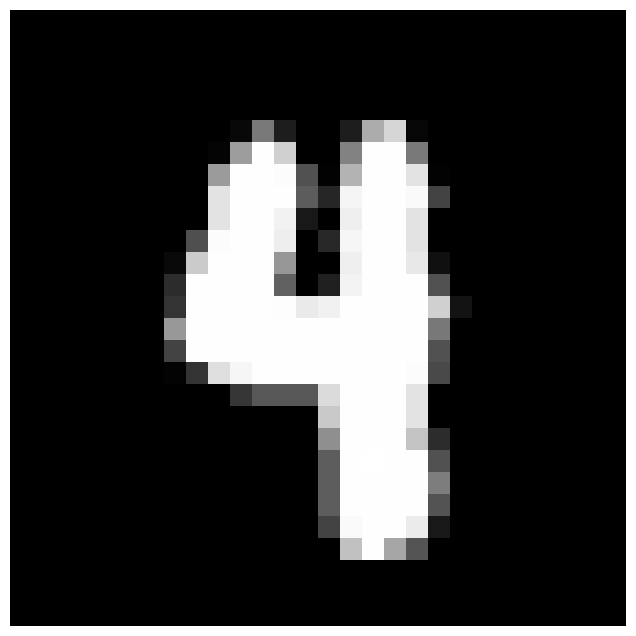

In [13]:
import matplotlib.pyplot as plt
image = x[250].reshape(28,28)
tmp = np.empty_like(image,dtype=str)


tmp[ image<64] =" "
tmp[(image>=64) & (image <128)]= "."
tmp[(image>=128) & (image <192)]= "*"
tmp[(image>=192) & (image <256)]= "#"

for row in tmp:
    print(''.join(row))

#or with matplotlib 
plt.figure(figsize=(8,8))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



4.3: Pixel frequency comparison by class

In [ ]:
#Masks:
mask_0= y=="0"
mask_1= y=="1"
x0=x[mask_0]
x1=x[mask_1]

#Count how many "on" pixels 1 and 0 have
n0=np.sum(x0 >= 128)        #without axis sums every row and then all together
n1=np.sum(x1>= 128)
print(f"0 Pixels: {n0}\n1 Pixels: {n1}")

0 Pixels: 134149
1 Pixels: 68978


In [141]:
#Absolute difference:
zeros = np.sum(x0 >= 128, axis=0) #with axis create a column vector with the sum for every row
ones = np.sum(x1 >= 128, axis=0)

index= np.argmax(abs(zeros-ones))
value = abs(zeros[index]-ones[index])
print(f"Best at index {index}, value {value}")

Best at index 406, value 1113


4.4 (*) Pairwise distance analysis

In [33]:
np.shape(y)

(10000,)

In [1]:

#np.random.seed(1123)
#indexes= np.random.randint(0,10000,4)
indexes= [25, 29, 31, 34]

v=x[indexes].copy()
norms=np.sum(v*v,axis=1,keepdims=True)      #for some reason np.norm gives some nan


distances=np.sqrt(norms + (norms).T -2*(v @ v.T))

print(distances)




NameError: name 'x' is not defined